<a href="https://colab.research.google.com/github/glcn35/statistics/blob/main/Statistics_Assignment_5_(Hypothesis_Tests)_D1178_G%C3%9CLCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [240]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
import scipy
print(scipy.__version__)

1.7.3


In [242]:
#pip install --upgrade scipy

EXERCISE 1. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826

EXERCISE 1.  Belirli bir sektördeki saatlik ücretler normal olarak ortalama 13,20$ ve standart sapma 2,50$ ile dağıtılır. Bu sektördeki bir şirket 40 işçi çalıştırıyor ve onlara saatte ortalama 12,20 dolar ödüyor. Bu şirket standartların altında ücret ödemekle suçlanabilir mi? Bir α = .01 seviye testi kullanın. (Wackerly, Ör.10.18)

KONTROL: istatistik: -2.5298221281347035, pdeğeri= 0.005706018193000826

In [243]:
mu=13.20 
s=2.50  
alpha = 0.01
size=40  #z testini uygula

In [244]:
# H0: mu = 13,20   #ho da populasyon parametresi yazılır
# H1: mu <13,20    #sol kuyrukta arayacağım .düşük maaş istenmez yüksekse sıkıntı olmaz

In [245]:
xbar=12.20  #yukarıda direkt sample mean mevcut

In [246]:
s_hata = s/np.sqrt(40)  #sampleın sapmasını yani standart error u hesapladım
s_hata

0.3952847075210474

In [247]:
z_test = (xbar - 13.20) / (s/np.sqrt(40))  #z scoru
z_test

-2.5298221281347035

In [248]:
stats.norm.cdf(z_test)   #z ye kadar olan bölgenin alanı

0.005706018193000826

In [249]:
p_value=stats.norm.cdf(12.20, loc=13.20, scale=s_hata)
p_value


0.005706018193000826

In [250]:
alpha=0.01
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")
  

reject the null


EXERCISE 2.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

ALIŞTIRMA 2. İki tip zemin için serbest basınç deneylerinden elde edilen kesme mukavemeti ölçümleri, aşağıdaki belgede gösterilen sonuçları vermiştir (metre kare başına ton cinsinden ölçümler). Zeminler, %1 anlamlılık düzeyinde ortalama kesme dayanımına göre farklılık gösteriyor mu?

İki tip zemin için sonuçlar

KONTROL: istatistik: 5.1681473319343345, pvalue= 2.593228732352821e-06

Independent Samples T Test Bağımsız Numuneler T Testi

In [251]:
df=pd.read_csv("/content/sample_data/soil - Sheet1.csv")  # na_values="0" da diyebilirmiyiz oratlamayı değiştirmemesi için?

In [252]:
df.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [253]:
# H0: mu1 = mu2
# H1: mu1 != mu2

In [254]:
df.Soil1.mean()

1.6918

In [255]:
df.Soil2.mean()

1.4171142857142855

In [256]:
#Perform Levene test for equal variances
#H0: The population variances are equal
#H1: There is a difference between the variances in the population
#The small p-value suggests that the populations do not have equal variances.
leveneTest = stats.levene(df["Soil1"][:30],df["Soil2"] )  
leveneTest

LeveneResult(statistic=0.31486292982090475, pvalue=0.5767018253541134)

In [257]:
indTest = stats.ttest_ind(df.Soil1,df.Soil2 , equal_var=True,nan_policy="omit")  
indTest

Ttest_indResult(statistic=5.1681473319343345, pvalue=2.5932287323528147e-06)

In [258]:
 p_value=indTest.pvalue
 p_value

2.5932287323528147e-06

In [259]:
alpha=0.01
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null


EXERCISE 3. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

 Aşağıdaki veri seti Dünya Bankası tarafından sağlanan verilere dayanmaktadır (https://datacatalog.worldbank.org/dataset/education-statistics). Dünya Bankası Edstatları.  2015 PISA Testi Veri Seti

Her kıta grubu (AS, EU, AF, NA, SA, OC) için tanımlayıcı istatistikleri (bir veri kümesinin dağılımının merkezi eğilimi, dağılımı ve şekli) alın.
Avrupa (AB) ve Asya (AS) ülkeleri arasında matematik puanları için (ortalama olarak) herhangi bir fark olup olmadığını belirleyin (normallik ve eşit varyanslar varsayalım). Yan yana kutu çizimleri çizin.
KONTROL: istatistik=0.870055317967983, pdeğer=0.38826888111307345

In [260]:
df=pd.read_csv("/content/sample_data/2015 PISA Test - Sheet1.csv")
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [261]:
df.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [262]:
df.groupby("Continent_Code")["Math"].mean()

Continent_Code
AF    363.212100
AS    466.216647
EU    477.981449
OC    494.559750
SA    402.887700
Name: Math, dtype: float64

In [263]:
df.groupby("Continent_Code")["Math"].std()

Continent_Code
AF     5.099513
AS    64.356490
EU    35.150403
OC     0.938401
SA    18.128894
Name: Math, dtype: float64

In [264]:
df.describe()

,internet_users_per_100,Math,Reading,Science
count,70.000000,70.000000,70.000000,70.000000
mean,71.973099,460.971557,460.997291,465.439093
std,16.390632,53.327205,49.502679,48.397254
min,21.976068,327.702000,346.549000,331.638800
25%,60.899020,417.416075,426.948625,425.923375
50%,72.999350,477.607150,480.199850,475.400050
75%,85.026763,500.482925,499.687475,502.431250
max,98.200000,564.189700,535.100200,555.574700


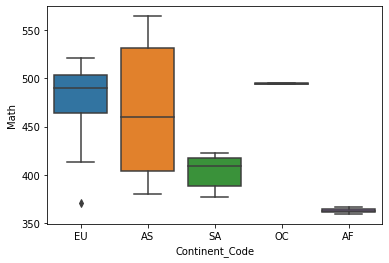

In [265]:
sns.boxplot(x="Continent_Code", y="Math", data=df);

In [ ]:
Math_AS=df[df["Continent_Code"]=="AS"].Math
Math_AS

In [ ]:
Math_EU=df[df["Continent_Code"]=="EU"].Math
Math_EU

In [268]:
leveneTest = stats.levene(Math_EU,Math_AS )
leveneTest

LeveneResult(statistic=14.300030628780675, pvalue=0.0004037413184451079)

In [269]:
indTest = stats.ttest_ind(Math_EU,Math_AS, equal_var=True)   
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [270]:
 p_value=indTest.pvalue
 p_value

0.38826888111307345

In [271]:
alpha=0.05 #default
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

fail to reject the null


EXERCISE 4.The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the English and Math sections, and want to determine whether students tended to score higher on their English or Math test, on average. We could use a paired t test to test if there was a significant difference in the average of the two tests.

Sample Dataset 2014

CHECK: statistic=36.312568981719856, pvalue=3.0710987192210606e-128



ALIŞTIRMA 4. Örnek veri seti, dört konu alanı için (100 puan üzerinden) yerleştirme testi puanlarına sahiptir: İngilizce, Okuma, Matematik ve Yazma. Örneklemdeki öğrenciler, üniversiteye kayıt olduklarında 4 yerleştirme sınavının hepsini tamamlamıştır. Özellikle İngilizce ve Matematik bölümleriyle ilgilendiğimizi ve öğrencilerin İngilizce veya Matematik sınavlarında ortalama olarak daha yüksek puan alıp almadıklarını belirlemek istediğimizi varsayalım. İki testin ortalamasında anlamlı bir fark olup olmadığını test etmek için eşleştirilmiş bir t testi kullanabiliriz.

Örnek Veri Kümesi 2014

KONTROL: istatistik=36.312568981719856, pvalue=3.0710987192210606e-128

In [272]:
df=pd.read_csv("/content/sample_data/students_2014 - students_2014.csv")
df.sample(3)

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,Smoking,Sprint,MileMinDur,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
46,33055,7/30/1995,4-Aug-2014,13-May-2019,1.0,NaN,0.0,1,69.78,NaN,0.0,4.673,NaN,NaN,74.07,57.48,73.15,In state,1.0,NaN,NaN,5.0,5.0
322,38020,5/29/1992,6-Aug-2012,14-May-2018,3.0,creative writing,1.0,0,62.43,171.13,1.0,7.170,0:08:57,86.20,79.24,59.85,75.76,NaN,0.0,1.0,15.0,3.0,11.0
89,24556,11/10/1994,4-Aug-2014,11-May-2020,1.0,finance,1.0,0,NaN,180.44,0.0,6.259,0:09:09,84.09,69.80,NaN,NaN,In state,1.0,NaN,NaN,8.0,1.0


In [ ]:
df.isnull().sum()

In [274]:
df.English.mean()

82.78755501222493

In [275]:
df.Math.mean()

65.46800947867297

In [276]:
stats.shapiro(df.Math.dropna())

ShapiroResult(statistic=0.9952573776245117, pvalue=0.22645071148872375)

In [277]:
stats.shapiro(df.English.dropna())

ShapiroResult(statistic=0.9965985417366028, pvalue=0.5434104800224304)

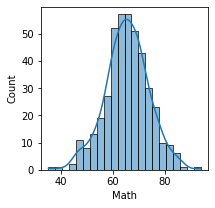

In [278]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.histplot(x="Math",data=df,kde=True)

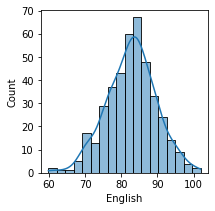

In [279]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.histplot(x="English",data=df,kde=True)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


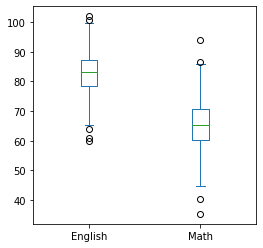

In [280]:
df[['English', 'Math']].plot(kind='box', figsize=(4,4));

In [281]:
#hypothesis H0: m1=m2 H1: m1!=m2(two side)

In [282]:
indTest = stats.ttest_rel(df.English,df.Math,nan_policy="omit")   
indTest

Ttest_relResult(statistic=36.31256898171986, pvalue=3.071098719220689e-128)

In [283]:
p_value=indTest.pvalue
p_value

3.071098719220689e-128

In [285]:
alpha=0.05
if p_value<alpha :
  print("reject the null")
else:
  print("fail to reject the null")

reject the null
